In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
LRU_hit = [(5000, 0.2435196957042255), (8500, 0.5002180746824194), (9000, 0.5918739736025789),  (10000, 0.7442859240951756),
			(10500, 0.7905941570820124), (11000, 0.866587991650855), (11500, 0.9146415638476681), (12000, 0.9364942788774643),
			(13000, 0.9553021076102131), (15000, 0.9737205172672126),  (17000, 0.9800647103241302), (18000, 0.9862694542643985),
			(20000, 0.9849454294068517), (30000, 0.9912020958905532)]

In [61]:
X = {}
for ix in range(len(LRU_hit)):
    X[LRU_hit[ix][0]] = LRU_hit[ix][1]

In [62]:
X.keys()

dict_keys([5000, 8500, 9000, 10000, 10500, 11000, 11500, 12000, 13000, 15000, 17000, 18000, 20000, 30000])

In [63]:
mem = [5000,8500,9000,10000,10500,11000,11500,12000,13000,15000,17000,18000,20000,30000]

In [88]:
def get_hit_rate(cold, dropped):
    # cold = [float(x)/10 for x in cold]
    # dropped = [float(x)/10 for x in dropped]
    miss_rate = [(cold[i] + dropped[i]) for i in range(len(cold))]
    hit_rate = [(1 - x) for x in miss_rate]
    # print(hit_rate)
    return hit_rate

def map_hitrate_to_mem(Y, mem):
    y_map = {}
    for ix in range(len(mem)):
        y_map[mem[ix]] = Y[ix]

    return y_map


def hit_rate_difference(X, Y):
    # X and Y are the hit-rate curves of two different policies
    # X is LRU
    # Ensure that they measure the hit-rate for the same memory sizes!
    # Higher differences are better!
    L1_diff = 0.0
    mem_x = [m for m in X.keys() if m >= 10000]
    for m in mem_x:
        d = Y[m] - X[m]
        L1_diff += d

    return L1_diff/float(len(mem_x))

In [89]:
results_dict = {}
L1scores = {}
f = open('keepalive_output.txt', 'r')
first = False 
for line in f:
    name = line.split('__')[0]
    mem_ign = line.split('__')[1]
    mem_ign = mem_ign.replace('[', '').replace(']', '')
    mem_ign = [int(x) for x in mem_ign.split(',')]
    # mem may not be in order!!
    
    cold = line.split('__')[2]
    cold = cold.replace('[', '').replace(']', '')
    cold = [float(x)/100.0 for x in cold.split(',')]

    dropped = line.split('__')[3]
    dropped = dropped.replace('[', '').replace(']', '')
    dropped = [float(x)/100.0 for x in dropped.split(',')]

    Y = get_hit_rate(cold, dropped) # These are percentages 
    #print(Y)
    Y = map_hitrate_to_mem(Y, mem)
    results_dict[name] = Y
    #print(name, Y)
    L1diff = hit_rate_difference(X, Y)
    L1scores[name] = L1diff
    print(name + ','+ str(L1diff))

NishaJabbar,-0.2949798821661159
AmanAgarwal,0.0036281988831024666
AkshithAlwala,-0.10490766603673446
AkshatArvind,-0.08640745202847164
BreanneBaker,-0.3630752225425642
HareeshBoondalapati,-0.1308233297141605
MartinBreth,-0.21348059630934169
DavanagereShakeel,-0.28515058167441015
JeffreyFrench,-0.06633794698615456
RutujaJadhav,-0.04727322317094502
NagaHarsha,-0.173141000020124
VarshaKaranam,-0.10490766603673446
AmitKasera,-0.16651920396641479
SowmyaReddy,-0.04110819504877457
ShilpaKumari,-0.0031856486296610764
NoahLitwiller,-0.21252048741381352
SriramManne,-0.18657346038851577
ShubhamMohapatra,0.020872444789752698
RyanOostland,-0.08583184330940598
BrendenOwens,-0.2504459034186625
AmitKumarPatel,-0.18338610140050618
AvinashPawar,-0.18850795910055804
NathanielPreddy,-0.3607714290866168
AnkitaPriya,-0.1277191018420419
AayushiRaje,-0.10490766603673446
AmberRamesh,-0.12623878335710348
KavyaRanganath,0.025915793831546973
PrasannaRengabashyam,-0.1956276521069838
ThomasReynods,-0.17314100002012

In [90]:
def compare_hr(name):
    rl = list(zip(*list(results_dict[name].items())))
    fig,ax=plt.subplots()
    ax.plot(X.keys(), X.values() ,label='LRU',color='r')
    ax.plot(rl[0], rl[1], label=name)
    ax.set_ylabel("Hit rate")
    ax.set_xlabel("Mem size")
    ax.legend()
    plt.title(L1scores[name])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


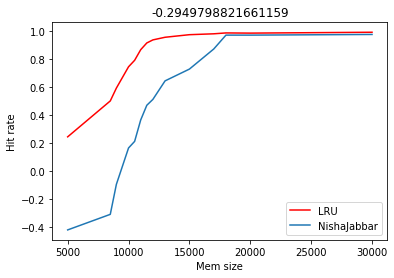

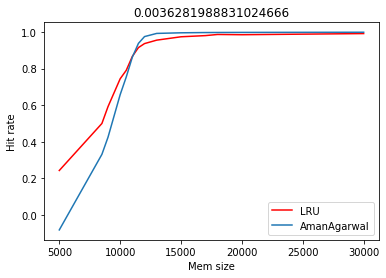

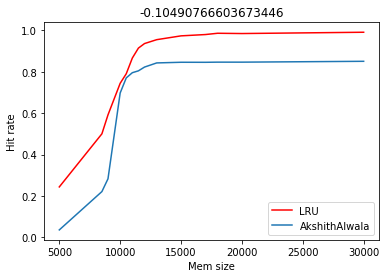

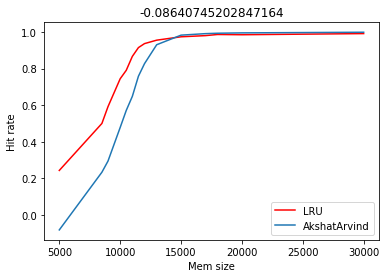

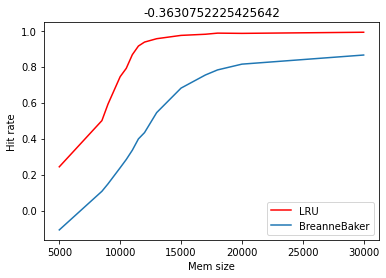

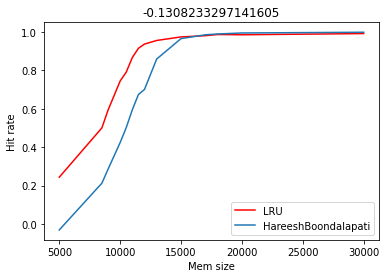

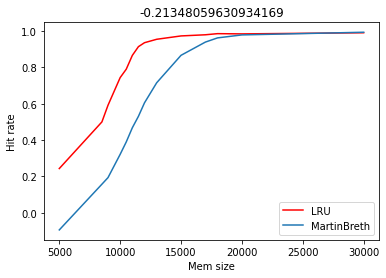

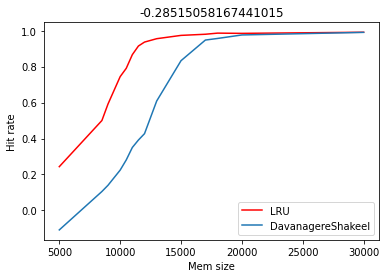

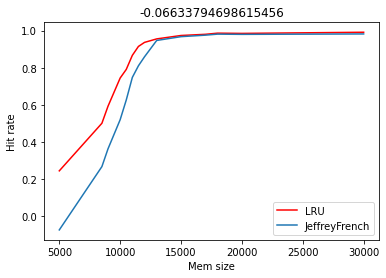

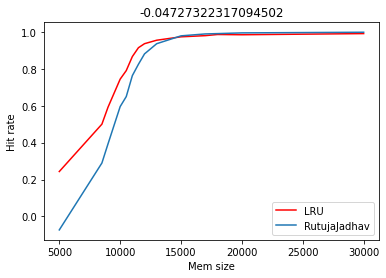

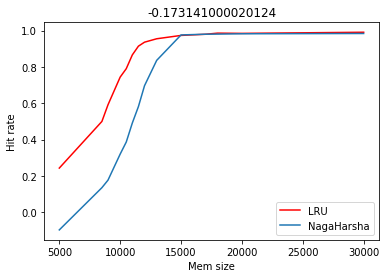

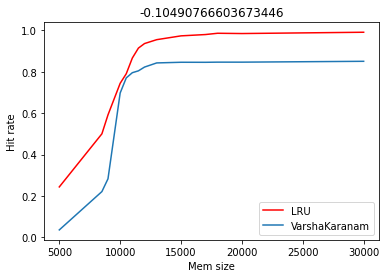

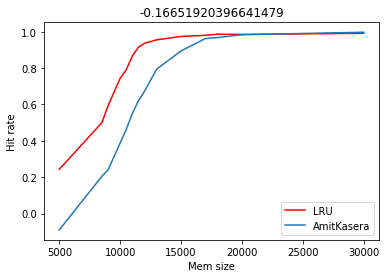

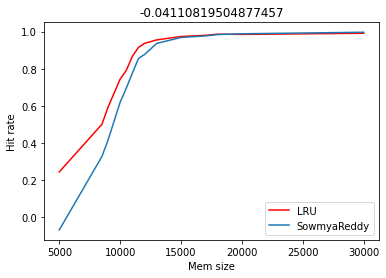

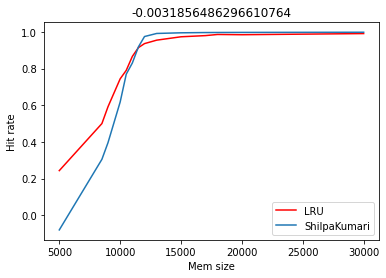

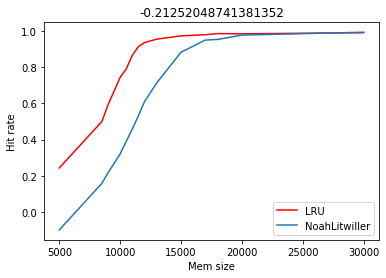

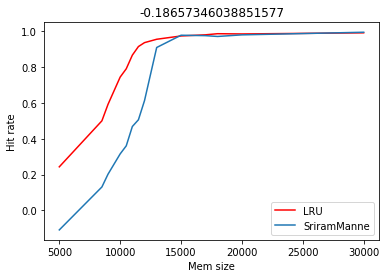

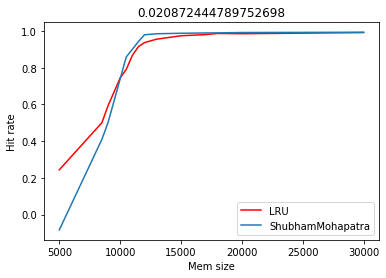

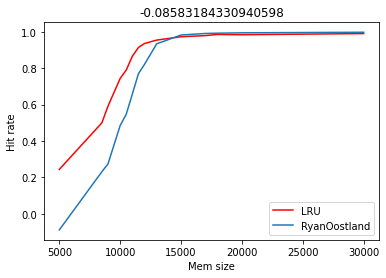

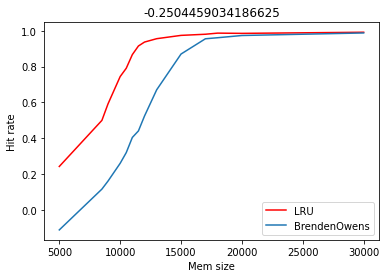

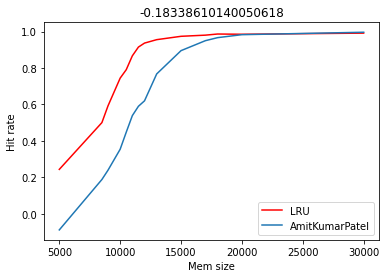

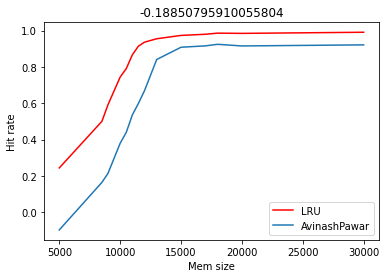

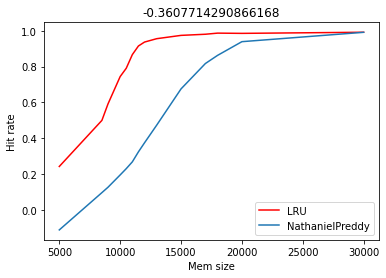

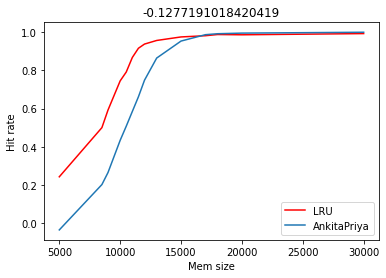

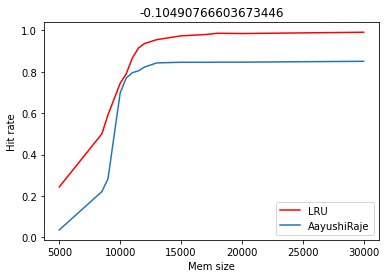

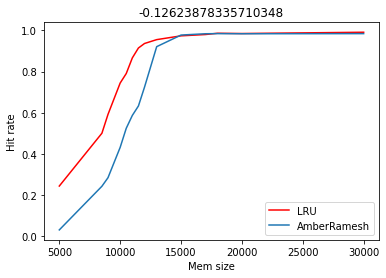

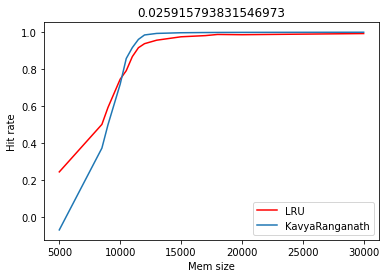

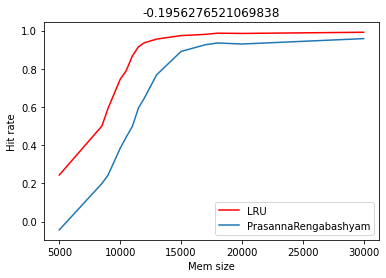

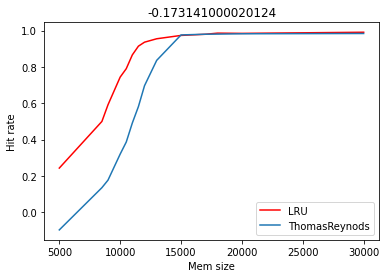

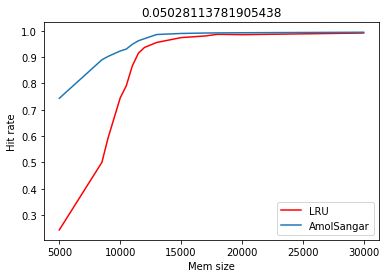

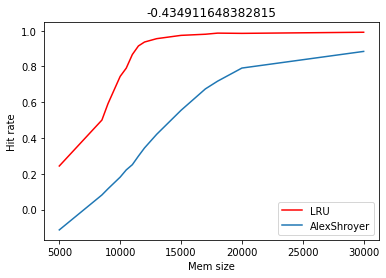

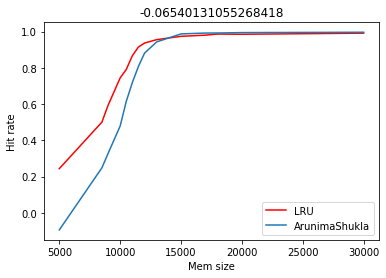

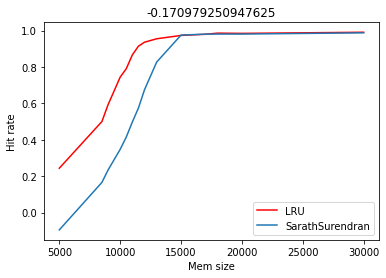

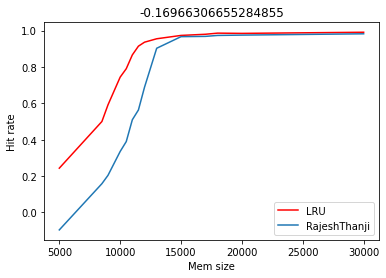

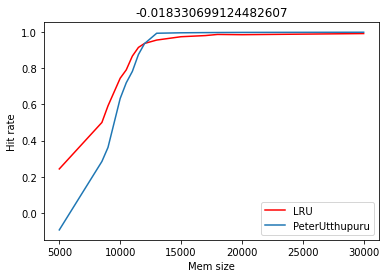

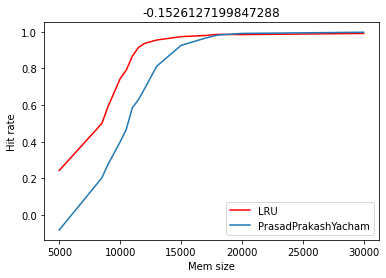

In [91]:
for n in results_dict.keys():
    if L1scores[n] > -10:
        compare_hr(n)

In [84]:
[name for name in L1scores if L1scores[name] > -1 and L1scores[name] < 0]

['AkshatArvind',
 'JeffreyFrench',
 'RutujaJadhav',
 'SowmyaReddy',
 'ShilpaKumari',
 'RyanOostland',
 'ArunimaShukla',
 'PeterUtthupuru']

In [85]:
L1scores

{'AayushiRaje': -1.153984326404079,
 'AkshatArvind': -0.950481972313188,
 'AkshithAlwala': -1.153984326404079,
 'AlexShroyer': -4.784028132210965,
 'AmanAgarwal': 0.03991018771412713,
 'AmberRamesh': -1.3886266169281383,
 'AmitKasera': -1.8317112436305627,
 'AmitKumarPatel': -2.017247115405568,
 'AmolSangar': 0.5530925160095982,
 'AnkitaPriya': -1.404910120262461,
 'ArunimaShukla': -0.7194144160795259,
 'AvinashPawar': -2.0735875501061383,
 'BreanneBaker': -3.993827447968206,
 'BrendenOwens': -2.7549049376052874,
 'DavanagereShakeel': -3.136656398418512,
 'HareeshBoondalapati': -1.4390566268557654,
 'JeffreyFrench': -0.7297174168477001,
 'KavyaRanganath': 0.2850737321470167,
 'MartinBreth': -2.3482865594027587,
 'NagaHarsha': -1.9045510002213641,
 'NathanielPreddy': -3.9684857199527848,
 'NishaJabbar': -3.2447787038272753,
 'NoahLitwiller': -2.3377253615519487,
 'PeterUtthupuru': -0.20163769036930868,
 'PrasadPrakashYacham': -1.6787399198320168,
 'PrasannaRengabashyam': -2.151904173176